In [18]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

In [19]:
male_df = pd.read_csv('male_cleaned.csv')
female_df = pd.read_csv('female_cleaned.csv')

In [20]:
gender = 'male'
weight = int(790)
length = int(1740)

In [21]:
## MALE

In [22]:
tshirt_size = []
tshirt_color = []

for chest, waist in zip(male_df['chestcircumference'], male_df['waistcircumference']):
    if chest < 965:
        if waist >= 860:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
        else:
            tshirt_size.append('Small')
            tshirt_color.append('Yellow')
    elif chest < 1040:
        if waist >= 915:
             tshirt_size.append('Large')
             tshirt_color.append('Red')
        else:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
    elif chest < 1120:
        if waist >= 965:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
        else:
            tshirt_size.append('Large')
            tshirt_color.append('Red')
    elif chest < 1195:
        if waist >= 1015:
            tshirt_size.append('XX-Large')
            tshirt_color.append('Purple')
        else:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
    elif chest < 1270:
        tshirt_size.append('XX-Large')
        tshirt_color.append('Blue')
    elif chest < 1345:
        tshirt_size.append('XXX-Large')
        tshirt_color.append('Brown')
    elif chest < 1500:
        tshirt_size.append('XXXX-Large')
        tshirt_color.append('Green')

male_df['tshirt_size'] = tshirt_size
male_df['tshirt_color'] = tshirt_color

In [23]:
## FEMALE

In [24]:
tshirt_size = []
tshirt_color = []

for chest, waist in zip(female_df['chestcircumference'], female_df['waistcircumference']):
    if chest < 965:
        if waist >= 860:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
        else:
            tshirt_size.append('Small')
            tshirt_color.append('Yellow')
    elif chest < 1040:
        if waist >= 915:
             tshirt_size.append('Large')
             tshirt_color.append('Red')
        else:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
    elif chest < 1120:
        if waist >= 965:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
        else:
            tshirt_size.append('Large')
            tshirt_color.append('Red')
    elif chest < 1195:
        if waist >= 1015:
            tshirt_size.append('XX-Large')
            tshirt_color.append('Purple')
        else:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
    elif chest < 1270:
        tshirt_size.append('XX-Large')
        tshirt_color.append('Blue')
    elif chest < 1345:
        tshirt_size.append('XXX-Large')
        tshirt_color.append('Brown')
    elif chest < 1500:
        tshirt_size.append('XXXX-Large')
        tshirt_color.append('Green')

female_df['tshirt_size'] = tshirt_size
female_df['tshirt_color'] = tshirt_color

In [25]:
closest = []

for data_length, data_weight in zip(male_df['stature'], male_df['weightkg']):
    delta_y = abs(length) - abs(data_length)
    delta_x = abs(weight) - abs(data_weight)
    hypo = delta_y ** 2 + delta_x ** 2
    closest.append(math.sqrt(hypo))

male_df['closest'] = closest
K = male_df.sort_values(by=['closest']).head(10)
print(f'T-shirt size:', K['tshirt_size'].value_counts().idxmax())
print(f'T-shirt color:', K['tshirt_color'].value_counts().idxmax())

T-shirt size: Medium
T-shirt color: Orange


<AxesSubplot:xlabel='weightkg', ylabel='stature'>

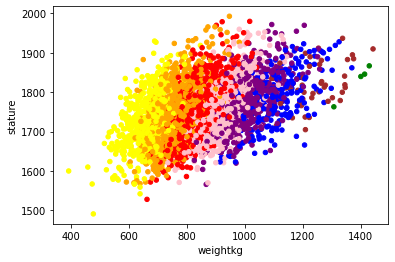

In [27]:
male_df.plot(kind='scatter', x='weightkg', y='stature', c='tshirt_color')

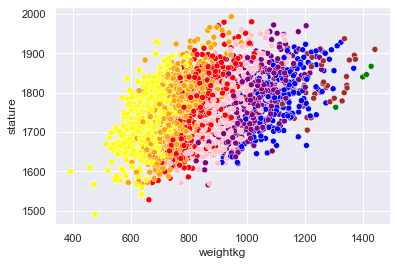

In [29]:
sns.set()
sns.scatterplot(y=male_df['stature'], x=male_df['weightkg'], c=male_df['tshirt_color'])
plt.show()

In [30]:
my_length = 1730
my_weight = 790

In [31]:
x = np.array(list(zip(male_df['stature'], male_df['weightkg'])))
y = np.array(male_df['tshirt_size'])
x.reshape(1, -1)

array([[1776,  815, 1702, ...,  731, 1828,  985]])

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x, y)

predicted=knn.predict([[my_length,my_weight]])
print(predicted)

['Medium']
